In [2]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.transform import resize
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Fungsi untuk mengambil daftar file gambar dari direktori
def get_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))
    return image_files

In [4]:
# Fungsi untuk meng-load dan mengubah gambar menjadi data numerik
def load_and_preprocess_images(image_files, target_size=(100, 100)):  # Tambahkan parameter target_size
    images_data = []
    for img_file in image_files:
        img = imread(img_file)
        if img is not None:
            # Resize gambar menjadi ukuran tertentu jika diperlukan
            img = resize(img, target_size)  # Resize gambar ke ukuran target
            images_data.append(img.flatten())  # Flatten gambar ke dalam satu dimensi
    return np.array(images_data)

In [5]:
# Load dataset gambar dari direktori tertentu
image_directory = "C:\\Users\\MSI GF63\\OneDrive\\Documents\\Folder Tugas\\SEMESTER 5\\MFDS\\Pertemuan 1\\mfds_data"
image_files = get_image_files(image_directory)
image_data = load_and_preprocess_images(image_files)

In [6]:
# Mendapatkan jumlah kelas (class) dari dataset gambar
num_classes = len(os.listdir(image_directory))
print(num_classes)

8


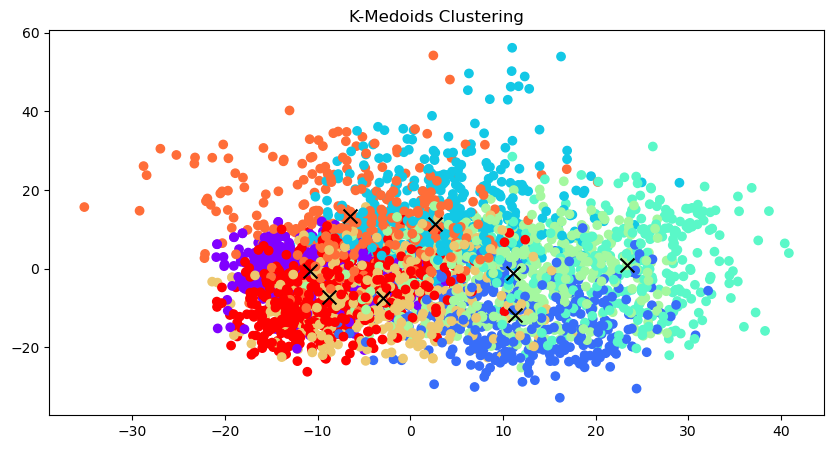

In [7]:
# Fungsi untuk menginisialisasi medoids secara acak
def initialize_medoids(data, k):
    medoids_idx = np.random.choice(len(data), k, replace=False)
    return data[medoids_idx]

# Fungsi untuk menghitung jarak antara data dan medoids
def compute_distances(data, medoids):
    distances = np.zeros((len(data), len(medoids)))
    for i, medoid in enumerate(medoids):
        distances[:, i] = np.linalg.norm(data - medoid, axis=1)
    return distances

# Fungsi untuk menentukan cluster berdasarkan medoids
def assign_clusters(distances):
    return np.argmin(distances, axis=1)

# Fungsi untuk menghitung total cost dari cluster
def total_cost(distances, assignments):
    return np.sum(distances[np.arange(len(distances)), assignments])

# Algoritma K-Medoids
def k_medoids(data, k, max_iters=100):
    medoids = initialize_medoids(data, k)
    for _ in range(max_iters):
        distances = compute_distances(data, medoids)
        assignments = assign_clusters(distances)
        new_medoids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
        if np.all(new_medoids == medoids):
            break
        medoids = new_medoids
    return medoids, assignments

# Contoh penggunaan algoritma K-Medoids
k = num_classes
medoids, assignments = k_medoids(image_data, k)

# Visualisasi hasil clustering dengan ukuran yang diubah
plt.figure(figsize=(10,5))  # Ubah ukuran visualisasi di sini
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_data)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=assignments, cmap='rainbow')
plt.scatter(pca.transform(medoids)[:, 0], pca.transform(medoids)[:, 1], marker='x', s=100, c='black')
plt.title('K-Medoids Clustering')
plt.show()

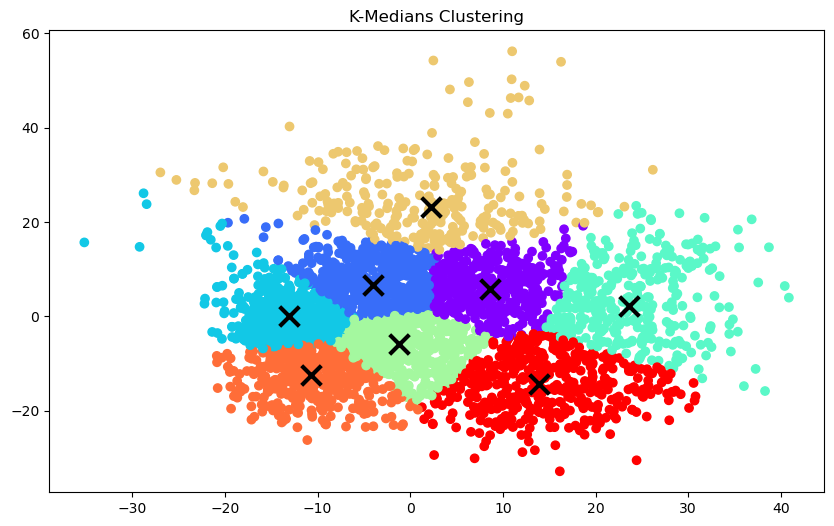

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.transform import resize
from scipy.spatial.distance import cdist

# Fungsi K-Medians
def kmedians(data, k, max_iters=100):
    # Inisialisasi titik pusat secara acak
    np.random.seed(0)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Hitung jarak setiap titik data ke setiap titik pusat
        distances = cdist(data, centroids, metric='euclidean')
        
        # Menggunakan titik pusat terdekat untuk menentukan cluster
        labels = np.argmin(distances, axis=1)
        
        # Menghitung titik pusat baru
        new_centroids = np.array([np.median(data[labels == i], axis=0) for i in range(k)])
        
        # Cek konvergensi
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Melakukan PCA untuk mengurangi dimensi data
pca = PCA(n_components=2)
image_data_pca = pca.fit_transform(image_data)

# Menjalankan algoritma K-Medians
k = num_classes  # Jumlah cluster yang diinginkan
labels, centroids = kmedians(image_data_pca, k)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(image_data_pca[:, 0], image_data_pca[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black')
plt.title('K-Medians Clustering')
plt.show()

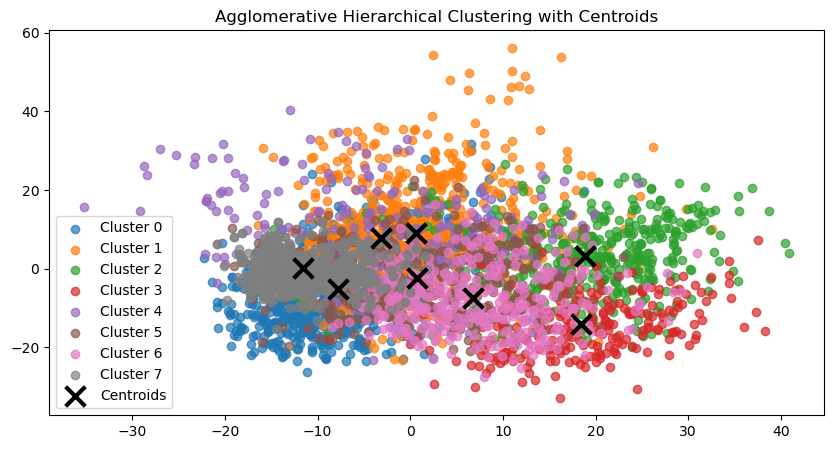

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Inisialisasi dan klastering dengan Agglomerative Hierarchical Clustering
num_clusters = num_classes  # Ganti dengan jumlah kelas yang Anda inginkan
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_labels = agg_clustering.fit_predict(image_data)

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(image_data)

# Visualisasi hasil klastering dengan scatter plot
plt.figure(figsize=(10, 5))
for cluster in range(num_clusters):
    cluster_data = reduced_data[agg_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.7)

# Tambahkan marker x untuk centroid (jika diperlukan)
centroids = np.array([cluster_data.mean(axis=0) for cluster_data in [reduced_data[agg_labels == i] for i in range(num_clusters)]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black', label='Centroids')

plt.legend()
plt.title('Agglomerative Hierarchical Clustering with Centroids')
plt.show()

In [25]:
import time

# Mengukur waktu runtime K-Medoids
start_time = time.time()
k_medoids(image_data, k)
medoids_time = time.time() - start_time

# Mengukur waktu runtime K-Medians
start_time = time.time()
kmedians(image_data_pca, k)
medians_time = time.time() - start_time

# Mengukur waktu runtime Agglomerative Hierarchical
start_time = time.time()
num_clusters = num_classes  # Ganti dengan jumlah kelas yang Anda inginkan
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_labels = agg_clustering.fit_predict(image_data)
agg_time = time.time() - start_time

print(f"Waktu runtime K-Medoids: {medoids_time} detik")
print(f"Waktu runtime K-Medians: {medians_time} detik")
print(f"Waktu runtime Agglomerative: {agg_time} detik")

Waktu runtime K-Medoids: 161.3307933807373 detik
Waktu runtime K-Medians: 0.04172778129577637 detik
Waktu runtime Agglomerative: 225.12220740318298 detik


In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Hitung Silhouette Score
silhouette_medoids = silhouette_score(image_data, assignments, metric='euclidean')
silhouette_medians = silhouette_score(image_data_pca, labels, metric='euclidean')
silhouette_agglomerative = silhouette_score(image_data, agg_labels, metric='euclidean')

# Hitung Davies-Bouldin Index
db_medoids = davies_bouldin_score(image_data, assignments)
db_medians = davies_bouldin_score(image_data_pca, labels)
db_agglomerative = davies_bouldin_score(image_data, agg_labels)

# Hitung Calinski-Harabasz Index
ch_medoids = calinski_harabasz_score(image_data, assignments)
ch_medians = calinski_harabasz_score(image_data_pca, labels)
ch_agglomerative = calinski_harabasz_score(image_data, agg_labels)

# Cetak hasil perbandingan
print("Perbandingan Metrik antara Algoritma K-Medoids, K-Medians, Agglomerative Hierarchical:")
print(f"Silhouette Score K-Medoids: {silhouette_medoids}")
print(f"Silhouette Score K-Medians: {silhouette_medians}")
print(f"Silhouette Score Agglomerative Hierarchical: {silhouette_agglomerative}")
print("\n")
print(f"Davies-Bouldin Index K-Medoids: {db_medoids}")
print(f"Davies-Bouldin Index K-Medians: {db_medians}")
print(f"Davies-Bouldin Index Agglomerative Hierarchical: {db_agglomerative}")
print("\n")
print(f"Calinski-Harabasz Index K-Medoids: {ch_medoids}")
print(f"Calinski-Harabasz Index K-Medians: {ch_medians}")
print(f"Calinski-Harabasz Index Agglomerative Hierarchical: {ch_agglomerative}")

Perbandingan Metrik antara Algoritma K-Medoids, K-Medians, Agglomerative Hierarchical:
Silhouette Score K-Medoids: 0.08962213547937818
Silhouette Score K-Medians: 0.35456988531532546
Silhouette Score Agglomerative Hierarchical: 0.05557491409345547


Davies-Bouldin Index K-Medoids: 2.4483957389654716
Davies-Bouldin Index K-Medians: 0.8504732449817787
Davies-Bouldin Index Agglomerative Hierarchical: 2.7417528466237053


Calinski-Harabasz Index K-Medoids: 227.1684729914362
Calinski-Harabasz Index K-Medians: 2852.7870438563737
Calinski-Harabasz Index Agglomerative Hierarchical: 181.19401189993337
